In [1]:
### Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
import networkx as nx
import time
import random
import csv
%matplotlib inline

In [2]:
G = nx.read_edgelist("./EDGES_FILE.csv", create_using=nx.DiGraph)
H = nx.read_edgelist("./EDGES_FILE.csv", create_using=nx.DiGraph)

In [3]:
len(list(G.nodes()))

956

In [4]:
nodes = []
for (x, y) in G.edges():
    if(x == y):
        if(H.has_node(x)):
            nodes.append(x)
            H.remove_node(x)

In [5]:
len(list(H.nodes()))

765

In [6]:
G = H
nx.is_weakly_connected(G)

True

In [7]:
i_time = time.time()
bet = G.in_degree()
print(f"Calculated scores in: {time.time() - i_time}")

Calculated scores in: 0.00014662742614746094


In [8]:
bet_l = []
max_v = max(dict(bet).values())
min_v = min(dict(bet).values())
for i in sorted(list(map(lambda x: int(x), list(G.nodes())))):
    bet_norm = (bet[str(i)] - min_v) / (max_v - min_v) 
    bet_l.append(bet_norm)

In [9]:
obj = pd.read_pickle("./AVPRA_pred.pickled")

### Heterogeneous 1

In [10]:
node_labels = []
for bet_v in bet_l:
    start_val = 0.0001
    i = 1
    while(True):
        if bet_v <= start_val:
            node_labels.append(i)
            break
        else:
            i += 1
            start_val *= 1.5

In [11]:
pd.Series(node_labels).value_counts()

19    141
20    124
18    115
21     80
17     65
22     62
16     51
15     31
23     29
13     13
14     13
12     12
11     11
1       7
9       6
24      5
dtype: int64

In [12]:
### Random forest classifier creation with 70 trees
clf = RandomForestClassifier(n_estimators=70)
f1_scores = []
for res in obj:
    start_time = time.time()
    
    X_data = list(map(lambda x: sorted(x, reverse=True), res[1]))
    X_data = [X_data[i] for i in range(len(X_data)) if str(i + 1) not in nodes]
    y_data = node_labels

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    ### Accuracy metric
    f1_scores.append(metrics.f1_score(y_test, y_pred, average="micro"))
    print(f"Iteration completed in {time.time() - start_time}")

Iteration completed in 0.10747575759887695
Iteration completed in 0.1125800609588623
Iteration completed in 0.14585089683532715
Iteration completed in 0.14551687240600586
Iteration completed in 0.1630251407623291
Iteration completed in 0.14303278923034668
Iteration completed in 0.1605234146118164
Iteration completed in 0.15227007865905762
Iteration completed in 0.15458416938781738
Iteration completed in 0.14665484428405762
Iteration completed in 0.15595722198486328
Iteration completed in 0.14636492729187012
Iteration completed in 0.15816235542297363
Iteration completed in 0.1674213409423828
Iteration completed in 0.1849374771118164
Iteration completed in 0.15198802947998047
Iteration completed in 0.1528172492980957
Iteration completed in 0.14989018440246582
Iteration completed in 0.15253114700317383
Iteration completed in 0.1586775779724121
Iteration completed in 0.1690225601196289


### Heterogeneous 2

In [13]:
node_labels = []
for bet_v in bet_l:
    ok = False
    for i in range(1, 11):
        if(bet_v <= 0.005 * i): 
            node_labels.append(i)
            ok = True
            break
    if ok: continue
    for i in range(1, 6):
        if(bet_v <= 0.05 + 0.01 * i):
            node_labels.append(10 + i)
            ok = True
            break
    if ok: continue
    if(bet_v <= 0.2):
        node_labels.append(16)
        continue
    node_labels.append(17)

In [14]:
pd.Series(node_labels).value_counts()

16    237
17    202
14     38
12     35
13     32
11     30
15     26
1      24
6      21
5      20
2      18
9      17
3      16
10     15
8      13
7      13
4       8
dtype: int64

In [15]:
### Random forest classifier creation with 70 trees
clf = RandomForestClassifier(n_estimators=70)
f1_scores2 = []
for res in obj:
    start_time = time.time()
     
    X_data = list(map(lambda x: sorted(x, reverse=True), res[1]))
    X_data = [X_data[i] for i in range(len(X_data)) if str(i + 1) not in nodes]
    y_data = node_labels

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    ### Accuracy metric
    f1_scores2.append(metrics.f1_score(y_test, y_pred, average="micro"))
    print(f"Iteration completed in {time.time() - start_time}")

Iteration completed in 0.08528304100036621
Iteration completed in 0.10556578636169434
Iteration completed in 0.13928532600402832
Iteration completed in 0.14700078964233398
Iteration completed in 0.1543748378753662
Iteration completed in 0.17664432525634766
Iteration completed in 0.17394661903381348
Iteration completed in 0.1602764129638672
Iteration completed in 0.18190884590148926
Iteration completed in 0.18730854988098145
Iteration completed in 0.16781306266784668
Iteration completed in 0.15196990966796875
Iteration completed in 0.1556870937347412
Iteration completed in 0.15226006507873535
Iteration completed in 0.15822291374206543
Iteration completed in 0.182023286819458
Iteration completed in 0.1975715160369873
Iteration completed in 0.17663955688476562
Iteration completed in 0.1688220500946045
Iteration completed in 0.14650344848632812
Iteration completed in 0.15414881706237793


In [16]:
max(f1_scores), (list(range(0, 10)) + list(range(10, 32, 2)))[f1_scores.index(max(f1_scores))]

(0.7058823529411765, 1)

In [17]:
max(f1_scores2), (list(range(0, 10)) + list(range(10, 32, 2)))[f1_scores2.index(max(f1_scores2))]

(0.7320261437908496, 1)

### Graphs creation

In [18]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})

In [20]:
plt.figure(figsize=(10, 6))
l = list(range(0, 10)) + list(range(10, 32, 2))
plt.plot(l, f1_scores, "o", label="F1-score intervalli [a]", markersize=10)
plt.plot(l, f1_scores2, "o", label="F1-score intervalli [b]", markersize=10)

plt.xlabel("Iterazione", fontsize=22)
plt.ylabel("F1-score", fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(0, 1)

plt.legend(loc="upper right", prop={'size': 16})

plt.savefig("Micro_comparison_INDegree.png", dpi=500)
plt.show()

/tmp/ipykernel_24973/743260567.py:17: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


/tmp/ipykernel_4327/2274445111.py:14: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


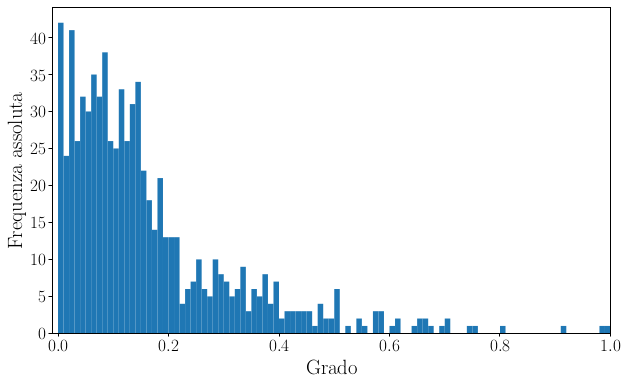

In [49]:
### Degree distrib function
serie = pd.Series(bet_l)
plt.figure(figsize=(10, 6))
plt.hist(serie, 100)
plt.xlabel("Grado", fontsize=22)
plt.ylabel("Frequenza assoluta", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(-0.01, 1)

plt.savefig("Distribution_distrib_INDegree.png", dpi=500)

plt.show()